# My favorite Scipy-Stats algorithms
This notebook contains a demonstration and visualisation of a hypothesis testing using ANOVA, available through scipy-stats Python library.

## 1. ANOVA

## 2. Dataset

## 3. Null - Hypothesis

## 4. Testing

## 5. Interpretation

## 6. Conclusion

## References
"Statistical functions (scipy.stats) - scipy v1.7.1 manual", 2021. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/stats.html

### Notes

#### probability distributions

Uniform - each value is equaly likely to be picked

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import math

In [2]:
uniform_data=stats.uniform.rvs(size=100000, #generate random 10k numbers
                               loc=0, #from 0
                               scale=10) #to 10

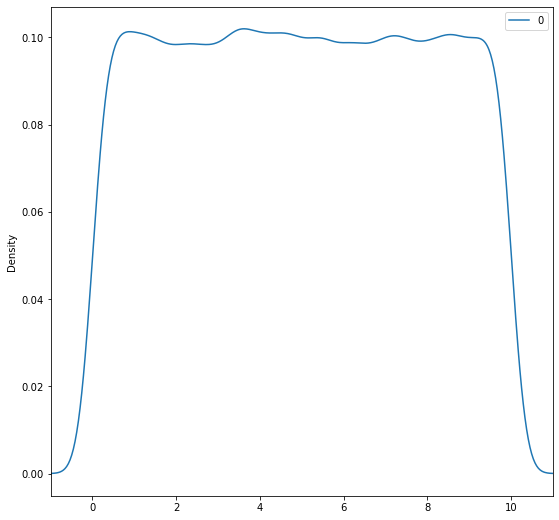

In [3]:
pd.DataFrame (uniform_data).plot(kind="density", #Plot the distribution
                                figsize=(9,9),
                                xlim=(-1,11));

we have the flat value where each value is equally likely to happen

In [4]:
stats.uniform.cdf(x=2.5, #cutoff value (quantile) to check
                 loc=0, #distribution start
                 scale=10) #distribution end

#cdf gives you an area under the distribution's density to the left of a certain value of the x axis

0.25

In [5]:
stats.uniform.ppf(q=0.4, #what x value we need to slice 40% of dist to the left of it?
                 loc=0,
                 scale=10)

#invers of cdf

4.0

In [6]:
#stats.distribution.pdf()

for x in range (-1,12,3):
    print("Density at x value"+str(x))
    print(stats.uniform.pdf(x,loc=0,scale=10))

Density at x value-1
0.0
Density at x value2
0.1
Density at x value5
0.1
Density at x value8
0.1
Density at x value11
0.0


Values outsode of range have no probability of happening while all values inside of range have equal probability.

In [7]:
import random

In [8]:
random.randint(0,10) #get a random integer in a specific range

9

In [9]:
random.choice([2,4,6,9]) #get a random element from a sequence of numbers

4

In [10]:
random.random() #get a real number between 0 and 1; balically from uniform distribution

0.9301415287686957

In [11]:
random.uniform(0,1) #output not the same as there is no seed

0.6254969780246649

In [12]:
random.seed(12)
random.uniform(0,1)

0.4745706786885481

In [13]:
random.seed(12)
random.random()

0.4745706786885481

Now we have the same output.

Numpy and scipy have different built in functions for generating random numbers

#### Normal distribution

Bell shaped curve, mean and median are equal. 99.7% lies within 3 standard deviations.

In [14]:
prob_under_minus1=stats.norm.cdf(x=-1,
                                loc=0,
                                scale=1)
prob_over_1= 1- stats.norm.cdf(x=1,
                                loc=0,
                                scale=1)
between_prob=1-(prob_under_minus1+prob_over_1)
print(prob_under_minus1,between_prob)

0.15865525393145707 0.6826894921370859


Roughly 16% of data generated by a normal distr. is within 1 standard deviation from the mean.

In [15]:
print(stats.norm.ppf(q=0.025)) #find the quantile for 2.5% cutoff


-1.9599639845400545


In [16]:
print(stats.norm.ppf(q=0.975)) #find the quantile for 97.5% cutoff

1.959963984540054


In [17]:
print(stats.norm.cdf(x=3)) #data below -3

0.9986501019683699


In [18]:
print(stats.norm.cdf(x=-3))

0.0013498980316300933


### Binomial distribution

Discrete probability distribution. Answers: How likely it is to achieve p number of successes in n trials of the experiment?

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts  13  98  406  1163  2090  2409  2096  1192  426  96  11


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

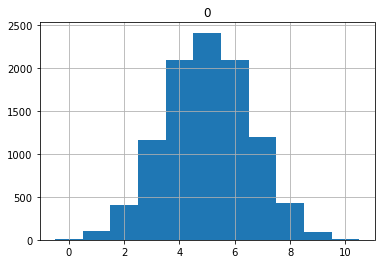

In [19]:
fair_coin_flips=stats.binom.rvs(n=10, #n of flips per trials
                               p=0.5, #success probability
                               size=10000) #n of trial
print(pd.crosstab(index="counts",columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11)

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   2   7  63  238  914  2012  2967  2772  1025


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

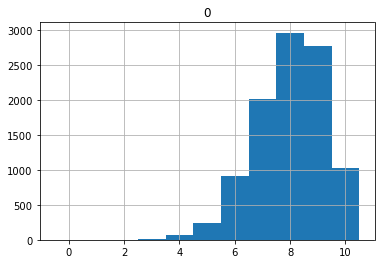

In [20]:
biased_fair_coin_flips=stats.binom.rvs(n=10, #n of flips per trials
                               p=0.8, #success probability, 
                               size=10000) #n of trial
print(pd.crosstab(index="counts",columns=biased_fair_coin_flips))
pd.DataFrame(biased_fair_coin_flips).hist(range=(-0.5,10.5),bins=11)

as we set the success probability to 0.8, this is how the function looks like.

In [21]:
stats.binom.cdf(k=5,n=10,p=0.8) #prob of getting 5 successes or less with 10 flips and success probability of 80%

0.032793497599999964

#### Geometric and exponential

Geometric is discrete and exponential is a continuous.

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  16
row_0                                                                  
counts  5054  2432  1238  656  324  154  72  36  15  10   4   2   2   1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

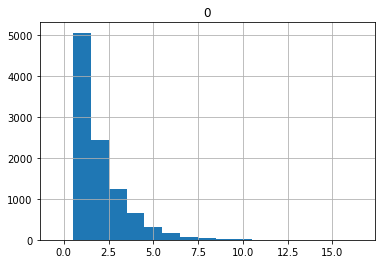

In [22]:
#how many flips we need to get to flipp on the head side of the coin?
random.seed(12)

flips_till_heads=stats.geom.rvs(size=10000, #generate geometric data
                                p=0.5) #with success prob 0.5

#print table of counts
print(pd.crosstab(index="counts", columns=flips_till_heads))

#plot
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5),
                                    bins=max(flips_till_heads)+1)

it is very likely to take 1 or 2 flips to get to head, but more unlikely to take more than 5 flips.

Exponentional 

In [23]:
#Get the prob of waiting more than 1 time unit before a success
prob_1=stats.expon.cdf(x=1,
                       scale=1) #arrival rate
1-prob_1 #the avf time for expon is 1-arrival rate

0.36787944117144233

#### Poisson distribution

Number of successes in certain time interval, e.g. number of arrivals to the hospital in a given time

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3746  3632  1856  585  153  22  5  1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

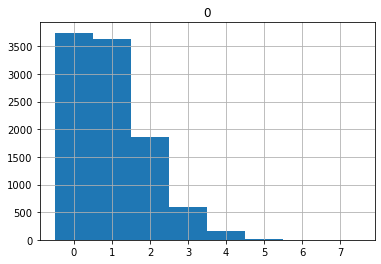

In [24]:
random.seed(12)
arrival_rate_1=stats.poisson.rvs(size=10000, #generate poisson data
                                mu=1) #avg arrival time is 1
#print table of counts
print(pd.crosstab(index="counts",columns=arrival_rate_1))

#plot
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                 bins=max(arrival_rate_1)+1)

It seems that we often see 0 and 1 arrivals within one hour, we see 2 people arriving half as often and so on.

Please note than Poisson distribution will not always look right skewed, as opposed to geo/expo. It depends on how we set it up.

col_0   1   2   3    4    5    6    7     8     9     10  ...   14   15   16  \
row_0                                                     ...                  
counts   6  29  74  184  371  648  924  1135  1199  1291  ...  516  327  200   

col_0    17  18  19  20  21  22  24  
row_0                                
counts  136  70  38  13  11   4   1  

[1 rows x 23 columns]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

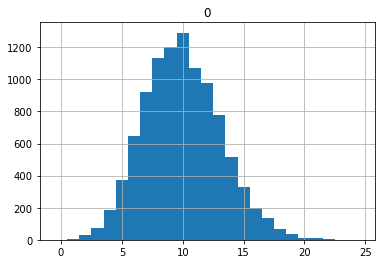

In [25]:
random.seed(12)
arrival_rate_1=stats.poisson.rvs(size=10000, #generate poisson data
                                mu=10) #avg arrival time is 1
#print table of counts
print(pd.crosstab(index="counts",columns=arrival_rate_1))

#plot
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                 bins=max(arrival_rate_1)+1)

Like this. If the avg arrival time is 10, distribution will look like this.

### Confidence intervals

Let's say I want to do some analysis on the people voting on elections. I want to estimate the average age of the population

In [26]:
#point estimates are estimates of population parameters based on sample data
#sample mean is used
np.random.seed(10)
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000) #random values
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=10000)
population_ages=np.concatenate((population_ages1,population_ages2))

population_ages.mean() #population mean

51.4444625

In [27]:
#taking a sample
np.random.seed(6)
sample_ages=np.random.choice(a=population_ages,
                            size=500) #sample 500 values from the population
print(sample_ages.mean()) #print sample mean

population_ages.mean()-sample_ages.mean() #check difference between the population and sample mean

51.008


0.43646249999999753

This shows we can get a pretty accurate estimate by using sample mean.

I might want to estimate the race ratio of the voters, to get the sense of the demographics of the voter base.

In [28]:
random.seed(10)
population_races=(["white"]*100000)+(["black"]*50000)+(["hispanic"]*50000)+(["asian"]*25000)+(["other"]*25000)

demo_sample=random.sample(population_races,1000) #sample 1000 values

for race in set(demo_sample):
    print(race+" propotion estimate:")
    print(demo_sample.count(race)/1000)

white propotion estimate:
0.379
asian propotion estimate:
0.099
black propotion estimate:
0.231
other propotion estimate:
0.099
hispanic propotion estimate:
0.192


Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume normal distribution (for its nice properties), however this is in reality rarely true.
I wwant to plot the data I generated and sample ans check the skeweness,

-1.1256148418046046


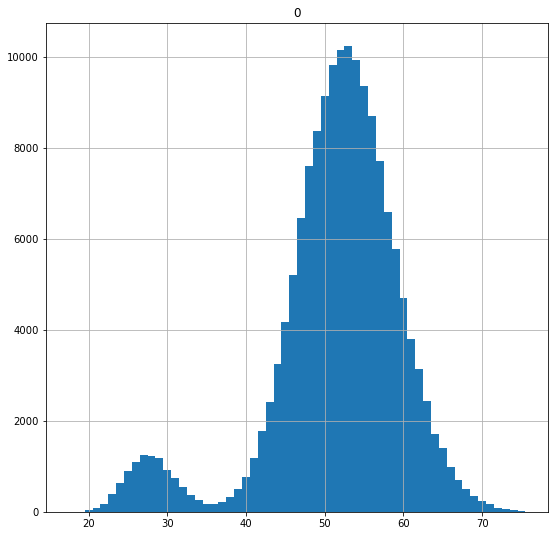

In [29]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))
print(stats.skew(population_ages));

-1.0992883065975738


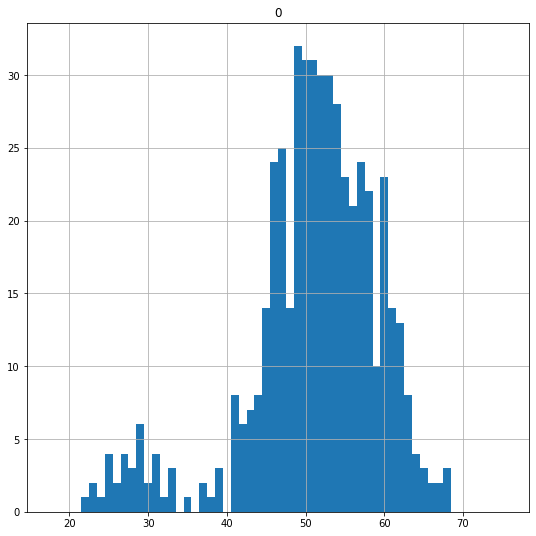

In [30]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))
print(stats.skew(sample_ages));

This looks very similar overall. But it clearly doesn't have normal distribution.
Does that mean we cannot apply the techniquest which assume normal distribution to this dataset?
NO. 
Luckily there is a central limit theorem, a theorem part of the probability theory. It states the sample distribution mean is normally distributed even tho the underlying data isn't.
Therefore, I can treat sample mean as if it was drawn from the normal distribution.
I will demonstrate that by creating a sampling distribution, taking 200 samples from the population and end plotting the means of those.

<AxesSubplot:ylabel='Density'>

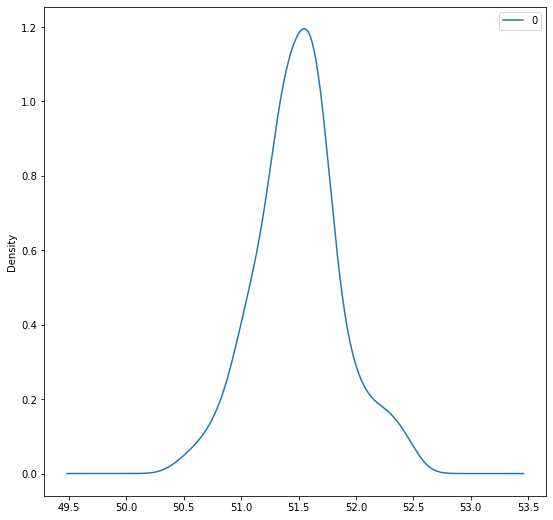

In [31]:
np.random.seed(10)
point_estimates=[] #making the empty list to hold point estimates

for x in range(200): #generate 200 samples
    sample=np.random.choice(a=population_ages,size=500)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",
                                  figsize=(9,9))

It looks normally distributed.

In [32]:
#the mean of the sampling distr approaches the true population mean
population_ages.mean()-np.array(point_estimates).mean()

-0.05517749999999921

The difference is so small. The more samples we take the better estimate of the population

Confidence interval
As estimates are prone to errors, a confidence level is a range of values above and below the point estimate that captures the true population parameter of some predetermined confidence level.
e.g. I want to have 95% confidence level.
To create a confidence interval we add a marginal error to the point estimate.
To calculate marginal error,we need st deviation of a population. The formula is
*z x sigma/sq root of n*
where sigma is the population standard deviation, n is sample size and z is z critical value (n of st dev you have to go from the mean of the normal distribution to capture the proportion of the data associated with desired cof level).
e.g. 95% of data lies in 2 st deviation; check z table for this.

I will calculate 95% conf interval for my mean point estimate


In [33]:
np.random.seed(10)

sample_size=1000
sample=np.random.choice(a=population_ages,size=sample_size)
sample_mean=sample.mean()

z_critical=stats.norm.ppf(q=0.975) #get the z critical value

print("z-critical value:")
print(z_critical) #print z critical value

pop_stdev=population_ages.std() #get pop st dev

margin_of_error=z_critical*(pop_stdev/math.sqrt(sample_size))

confidence_interval=(sample_mean-margin_of_error,
                    sample_mean+margin_of_error)

print("confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
confidence interval:
(51.1218997189614, 52.1581002810386)


In case we don't know the st dev of population, we have to use st dev of the mean. Consequently, this will result in more errors. 
To account for this error I will use t-value instead of z-value. T-value is drawn from t-distribution, which closely resembles the normal distributionbut gets wider and wider as the sample size falls. 
I can use scipy stats for this by using stats.t.ppf() .
 


In [34]:
np.random.seed(10)

sample_size=25
sample=np.random.choice(a=population_ages,size=sample_size)
sample_mean=sample.mean()

t_critical=stats.t.ppf(q=0.975,df=24) #get the z critical value

print("t-critical value:")
print(t_critical) #print z critical value

sample_stdev=sample.std(ddof=1) #get pop st dev

sigma=sample_stdev/math.sqrt(sample_size) #st dev estimate)

margin_of_error=t_critical*sigma
                             
confidence_interval=(sample_mean-margin_of_error,
                    sample_mean+margin_of_error)

print("confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
confidence interval:
(47.90096481477647, 53.93903518522353)


Scipy stats allows us to calculate these confidence intervals automatically bu using stats.t.interval():


In [35]:
stats.t.interval(alpha=0.95, #conf level
                df=24, # degrees of freedom
                loc=sample_mean, #sample mean
                scale=sigma) #st dev estimate

(47.90096481477647, 53.93903518522353)

Finally, I can also make a cofidence intervals for a point estimate of a population proportion. So we can do that on the race proportions.
I will calculate a 95% confidence interval for Hispanics according to the statistics calculated above (0.192)

In [36]:
z_critical=stats.norm.ppf(0.975)
p=0.192 #point estimate of proportion
n=1000 #sample size
margin_of_error=z_critical*math.sqrt((p*(1-p))/n)
confidence_interval=(p-margin_of_error, #calculate the interval
                    p+margin_of_error)
confidence_interval

(0.16758794241348748, 0.21641205758651252)

The conf interval covers the true proportion size which is 0.20.

Scipy stats also can calculate this for us:

In [37]:
stats.norm.interval(alpha=0.95, #conf level
                   loc=0.192, #point estim of proportion
                   scale=math.sqrt((p*(1-p))/n)) #scaling factir

(0.16758794241348748, 0.21641205758651252)

### T test

Describe what it is.

In short, hypothesis tests are based on a statement called the null hypothesis. Null hypothesis assumes that nothing interesting is going on between the variables we are testing. Eg. I test if two groups differ, the null hypothesis says I cannot confirm those group differ, they are the same.
If there is little evidence against the null hypothesis, we accept the null hypothesis. If there is significant evidence against, we might accept the alternative hypothesis. Alternative hypothesis depends on the type of test we carry out. In this case, two groups significantly differ. 

We need population distribution and sample data which we will compare to the population.

Then we choose a significance level (alpha). This is a probability threshold that determines when you reject the null hypothesis. If the probability level genereted by the test is lowe than the significance level, we reject the null hypothesis in favor of alternative.

T test is a statistical test used to determine whether a numeric data sample differs significantly from the population or another sample.

### One sample t test

In [38]:
np.random.seed(6)
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000) #random values
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=10000)
population_ages=np.concatenate((population_ages1,population_ages2))

amsterdam_ages1=stats.poisson.rvs(loc=18,mu=30,size=30) #random values
amsterdam_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
amsterdam_ages=np.concatenate((amsterdam_ages1,amsterdam_ages2))

print(population_ages.mean())
print(amsterdam_ages.mean())

51.4431
40.58


We know 2 means are different because I used slightly different distribution.
Now, i can conduct a 95% confidence t test and see whether the test will actually reject the null hypothesis (h0= sample comes from the same distribution). For that I can use stats.ttest_1samp():

In [39]:
stats.ttest_1samp(a=amsterdam_ages,
                 popmean=population_ages.mean())

Ttest_1sampResult(statistic=-6.65081423661494, pvalue=2.3060044179137718e-08)

t statistics is -6.65 and p value is very very small. It is smaller than 0.05, we can't accept the null hypothesis.

-6.65 tells us how much the mean of the sample deviates from the mean of the population. The higher T value (or absolute of t value) and the smaller the p, the more sure we are we cannot accept the null hypothesis.

In [40]:
stats.t.ppf(q=0.025, #check quantiles
           df=49) #degrees of freedom

-2.0095752344892093

stats.t.ppf(q=0.975, #check quantiles
           df=49) #degrees of freedom

In [41]:
stats.t.ppf(q=0.975,
            df=49)#check quantiles df=49) #degrees of freedom

2.009575234489209

In [42]:
stats.t.cdf(x=-2.5742,
           df=49)*2 #multipy by 2 for 2 sided test

0.013121066545690117

We expect to see the data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case p value is lower than significance level of 0.05 so we should reject the null hypothesis.

## Two sample t test


In [43]:
np.random.seed(12)
rotterdam_ages1=stats.poisson.rvs(loc=18,mu=33,size=30) #random values
rotterdam_ages2=stats.poisson.rvs(loc=18,mu=13,size=20)
rotterdam_ages=np.concatenate((rotterdam_ages1,rotterdam_ages2))
print(rotterdam_ages.mean())


42.8


In [44]:
stats.ttest_ind(a=amsterdam_ages,
               b=rotterdam_ages,
               equal_var=False) #assume samples have equal variance?

Ttest_indResult(statistic=-1.0079788186778762, pvalue=0.3159716969179097)

p value of 0.31 we do accept the null hypothesis,

### Paired T test

To test the same sample in two points in time.

Eg check weights at two points in time to see if the group lost weight.

In [45]:
np.random.seed(11)
before=stats.norm.rvs(scale=30,loc=250,size=100)
after=before+stats.norm.rvs(scale=5,loc=-1.25,size=100)
weight_df=pd.DataFrame({"weight_before":before,
                       "weight_after":after,
                       "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [46]:
stats.ttest_rel(a=before,
               b=after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

0.01 p value, meaning there is a significat difference in weight under 95% confidence.

### ANOVA

T test does work good when dealing with two groups, however, sometimes it is neccessery to compare three or more groups at the same time. If we do the t test on each pair of vaiables, the chances of false positives increase, so this is not a good solution. Thats when ANOVA or analysis of variance comes in.

Let's try to perform one way ANOVA test on three group.
Python scipy library allows us to do this.

In [50]:
np.random.seed(12)
#import some dataset from csv
df=pd.read_csv(r'C:\Users\mvukas\repo\Diet_R.csv')
print(df)

    Person gender  Age  Height  pre.weight  Diet  weight6weeks
0       25          41     171          60     2          60.0
1       26          32     174         103     2         103.0
2        1      0   22     159          58     1          54.2
3        2      0   46     192          60     1          54.0
4        3      0   55     170          64     1          63.3
..     ...    ...  ...     ...         ...   ...           ...
73      74      1   35     183          83     3          80.2
74      75      1   49     177          84     3          79.9
75      76      1   28     164          85     3          79.7
76      77      1   40     167          87     3          77.8
77      78      1   51     175          88     3          81.9

[78 rows x 7 columns]


In [52]:
df.describe() #describe dataset

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


The dataset shows three groups of people applying three different types of diet and their weight before and 6 weeks after diet change.

In [63]:
change=df['weight6weeks']-df['pre.weight']
df['weight_change']=change

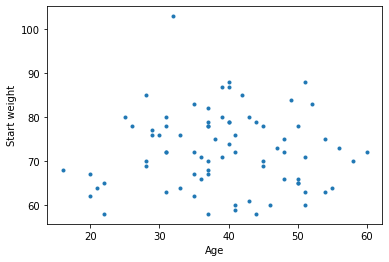

In [61]:
# Fancier, statistical plots.
import seaborn as sns

#Visualize data.
fig, ax=plt.subplots()

ax.plot(df['Age'],df['pre.weight'],'.')

ax.set_xlabel('Age');
ax.set_ylabel('Start weight');

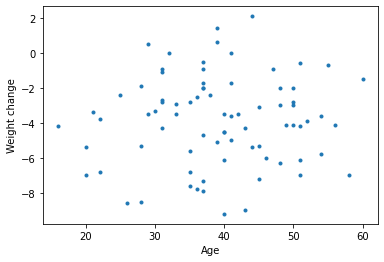

In [64]:
#Visualize data.
fig, ax=plt.subplots()

ax.plot(df['Age'],df['weight_change'],'.')

ax.set_xlabel('Age');
ax.set_ylabel('Weight change');

For now I see no pattern. Let's group people by the diet they applied in the 6 weeks.

In [65]:
x=df.groupby('Diet')
x

In [66]:
#Pivot tables
x.mean()

,Person,Age,Height,pre.weight,weight6weeks,weight_change
Diet,,,,,,
1,12.5,40.875000,170.291667,72.875000,69.575000,-3.300000
2,38.0,39.000000,174.851852,71.111111,68.085185,-3.025926
3,65.0,37.777778,167.259259,73.629630,68.481481,-5.148148


In [67]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '1'
j looks like:
   Person gender  Age  Height  pre.weight  Diet  weight6weeks  weight_change
2       1      0   22     159          58     1          54.2           -3.8
3       2      0   46     192          60     1          54.0           -6.0
4       3      0   55     170          64     1          63.3           -0.7


i is: '2'
j looks like:
    Person gender  Age  Height  pre.weight  Diet  weight6weeks  weight_change
0       25          41     171          60     2          60.0            0.0
1       26          32     174         103     2         103.0            0.0
16      27      0   44     174          58     2          60.1            2.1


i is: '3'
j looks like:
    Person gender  Age  Height  pre.weight  Diet  weight6weeks  weight_change
30      52      0   51     165          60     3          53.0           -7.0
31      53      0   35     169          62     3          56.4           -5.6
32      54      0   21     159          64     3          60.6       

We know in order to do ANOVA we have to fulfill some assumptions. Let's go through these assumptions.

### Assumption 1: Dependent variable

In [70]:
#The dependent variable.
dependent=df['weight_change']
dependent

0     0.0
1     0.0
2    -3.8
3    -6.0
4    -0.7
     ... 
73   -2.8
74   -4.1
75   -5.3
76   -9.2
77   -6.1
Name: weight_change, Length: 78, dtype: float64

In [71]:
dependent.describe()

count    78.000000
mean     -3.844872
std       2.551478
min      -9.200000
25%      -5.550000
50%      -3.600000
75%      -2.000000
max       2.100000
Name: weight_change, dtype: float64

### Assumption 2: Independent variable

In [75]:
df.Diet=df.Diet.astype(str)
df.Diet

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: object

In [76]:
#Independent variable.
independent=df['Diet']
independent

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: object

### Assumption 4: Outliers

<AxesSubplot:xlabel='weight_change', ylabel='Diet'>

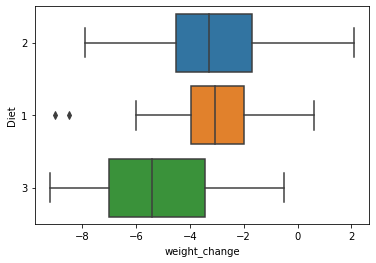

In [77]:
sns.boxplot(x=dependent,y=independent)

It does look like we have two outliers in the group 1. We can windsorize these outliers or proceed now for the training purposes.

### Assumprion 5: Normality

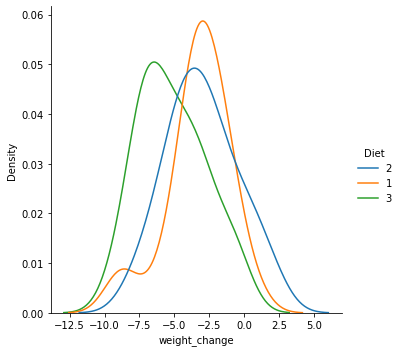

In [79]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

They do look quite normal, but let's do some additional tests.

In [80]:
#Extract Group 1
group_1=dependent[independent=='1']
group_1

2    -3.8
3    -6.0
4    -0.7
5    -2.9
6    -2.8
7    -2.0
8    -2.0
9    -8.5
10   -1.9
11   -3.1
12   -1.5
13   -3.0
14   -3.6
15   -0.9
45    0.6
46   -1.1
47   -4.5
48   -4.1
49   -9.0
50   -2.4
51   -3.9
52   -3.5
53   -5.1
54   -3.5
Name: weight_change, dtype: float64

In [82]:
#Run the Shapiro-Wilk test.
stats.shapiro(group_1)

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [83]:
#Run the test for the Group 2.
stats.shapiro(dependent[independent=='2'])

ShapiroResult(statistic=0.9855911731719971, pvalue=0.9611741304397583)

In [84]:
#Group 3.
stats.shapiro(dependent[independent=='3'])

ShapiroResult(statistic=0.9601254463195801, pvalue=0.3720393776893616)

As all statistics are greater than 0.05 we can deem the data normal.

### Assumption 6: Homogeneity of Variances

In [85]:
#Test for equal variances.
stats.levene(
    dependent[independent == '1'],
    dependent[independent == '2'],
    dependent[independent == '3']
)

LeveneResult(statistic=0.6256665777896312, pvalue=0.5376731304274011)

This is an F test, and statistic is greater than 0.05, hence we can assume the variances of our three groups are equal.

Now, we can proceed with ANOVA! finally...

### One-way ANOVA

In [86]:
#ANOVA
stats.f_oneway(
    dependent[independent == '1'],
    dependent[independent == '2'],
    dependent[independent == '3']
)

F_onewayResult(statistic=6.197447453165349, pvalue=0.0032290142385893524)

Conclusion: the mean weight change og three groups are the same, on average there is no significant difference between three diets.